# IE48B Homework 1 Gesture Recognition

## Yusuf Sina Öztürk - 2017402153

- In this report, we are going to analyze gesture recognition dataset which is taken from [this source](https://drive.google.com/drive/u/0/folders/13553neknux7U8why55KM1WrjgkA9IJKm). 
- Data was in multivariate time series format and it has 3 dimension (x,y,z). In order to use the data properly we need to do some manipulation in the dataset.

**Adding required libraries**

In [ ]:
library("data.table")
library("ggplot2")
library("repr")
library("scatterplot3d")

**Reading Data from local**

In [12]:
x <- fread("uWaveGestureLibrary_Z_TRAIN")
y <- fread("uWaveGestureLibrary_Y_TRAIN")
z <- fread("uWaveGestureLibrary_Z_TRAIN")

head(x)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


### Data Manipulation

Adding `class` and `id` attribute names

In [13]:
names(x)[1] <- paste("class")
x[,class:=as.character(class)]
x[,id:=1:.N]

head(x)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V308,V309,V310,V311,V312,V313,V314,V315,V316,id
6,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,-1.5289651,...,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976,1
5,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,1.7868688,...,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071,2
5,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,0.5212487,...,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,3
3,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,0.3094552,...,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735,4
4,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,-0.4660215,...,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725,5
8,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,0.6564008,...,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594,6


Convert data into long format and change `value` attribute name into `x_value`

In [14]:

long_train_x=melt(x,id.vars=c('id','class'))
head(long_train_x)


long_train_x[,time:=as.numeric(gsub("\\D", "", variable))-1]
head(long_train_x)

long_train_x=long_train_x[,list(id,class,time,value)]

names(long_train_x)[4] <- paste("x_value")
head(long_train_x)

id,class,variable,value
1,6,V2,-1.5289651
2,5,V2,1.7868688
3,5,V2,0.5212487
4,3,V2,0.3094552
5,4,V2,-0.4660215
6,8,V2,0.6564008


id,class,variable,value,time
1,6,V2,-1.5289651,1
2,5,V2,1.7868688,1
3,5,V2,0.5212487,1
4,3,V2,0.3094552,1
5,4,V2,-0.4660215,1
6,8,V2,0.6564008,1


id,class,time,x_value
1,6,1,-1.5289651
2,5,1,1.7868688
3,5,1,0.5212487
4,3,1,0.3094552
5,4,1,-0.4660215
6,8,1,0.6564008


Now, we also need to do same manipulation in the `y-axes` data set. 

In [15]:
names(y)[1] <- paste("class")
y[,class:=as.character(class)]
y[,id:=1:.N]

long_train_y=melt(y,id.vars=c('id','class'))

long_train_y[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train_y=long_train_y[,list(id,class,time,value)]

names(long_train_y)[4] <- paste("y_value")
head(long_train_y)




id,class,time,y_value
1,6,1,-2.1193958
2,5,1,0.6666239
3,5,1,-0.1897302
4,3,1,0.3740667
5,4,1,-0.3974369
6,8,1,-1.0800804


And also in the `z-axes`

In [16]:
names(z)[1] <- paste("class")
#z=z[order(class)]
z[,class:=as.character(class)]
z[,id:=1:.N]

long_train_z=melt(z,id.vars=c('id','class'))



long_train_z[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train_z=long_train_z[,list(id,class,time,value)]
#long_train_z=long_train_z[order(id,time)]

names(long_train_z)[4] <- paste("z_value")
head(long_train_z)


id,class,time,z_value
1,6,1,-1.5289651
2,5,1,1.7868688
3,5,1,0.5212487
4,3,1,0.3094552
5,4,1,-0.4660215
6,8,1,0.6564008


Finally, we can merge these three axes in a same dataset which named `long_train_all`

In [17]:
long_train_all <- merge(long_train_x, long_train_y)
long_train_all <- merge(long_train_all, long_train_z)
head(long_train_all)

id,class,time,x_value,y_value,z_value
1,6,1,-1.528965,-2.119396,-1.528965
1,6,2,-1.528965,-2.119396,-1.528965
1,6,3,-1.528965,-2.119396,-1.528965
1,6,4,-1.528965,-2.119396,-1.528965
1,6,5,-1.528965,-2.119396,-1.528965
1,6,6,-1.528965,-2.119396,-1.528965


Put it into a proper order with respect to `id` and `time`

In [18]:
long_train_all=long_train_all[order(class)]
long_train_all=long_train_all[order(id,time)]

Now, we can visualize the data with respect to `x_values`, `y_values` and `z_values`. I used in order to visualize the data `scatterplot3d()` function. 

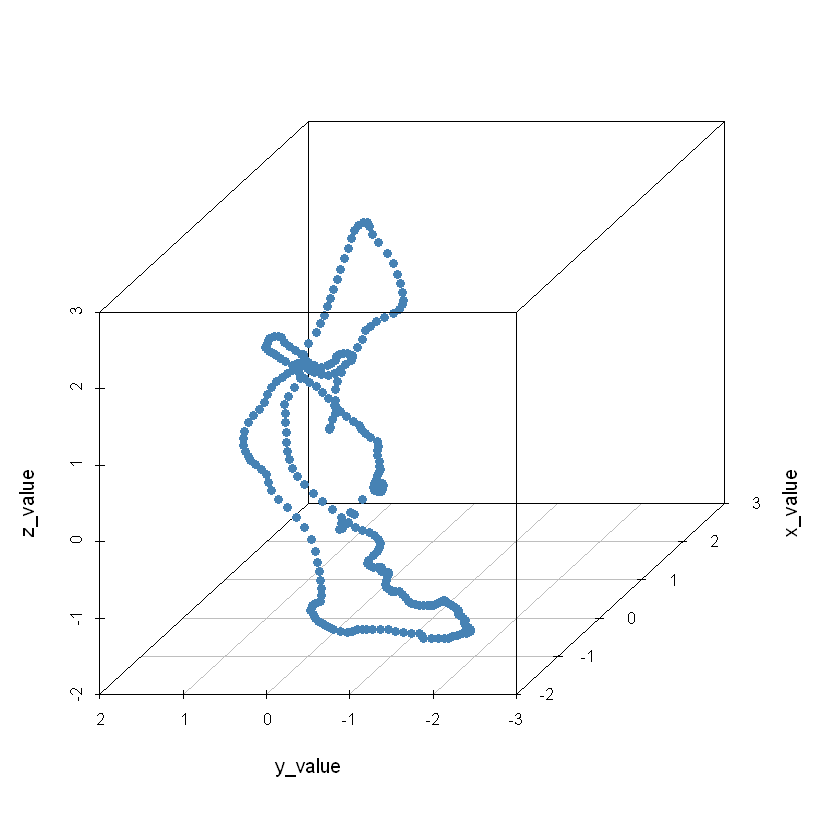

In [20]:
scatterplot3d(long_train_all[long_train_all$id == 895,4:6],angle = 225,pch = 16,color="steelblue")

As we can see above plot, it does not seem like any motion that homework description showed us because the attributes are accelaration attributes. In order to have the location information, we need to calculate cumlative sum of the attributes two times. First is going to be speed information and trhe second is location as we all now from basic physics.

### Cumulative Sum

In [21]:
speed_x <- cumsum(long_train_all$x_value)
long_train_all$speed_x <- speed_x

speed_y <- cumsum(long_train_all$y_value)
long_train_all$speed_y <- speed_y

speed_z <- cumsum(long_train_all$z_value)
long_train_all$speed_z <- speed_z

In [23]:
location_x <- cumsum(long_train_all$speed_x)
long_train_all$location_x <- location_x

location_y <- cumsum(long_train_all$speed_y)
long_train_all$location_y <- location_y

location_z <- cumsum(long_train_all$speed_z)
long_train_all$location_z <- location_z

Now, we have all the data we need to visualize our data. 

In [24]:
head(long_train_all)

id,class,time,x_value,y_value,z_value,speed_x,speed_y,speed_z,location_x,location_y,location_z
1,6,1,-1.528965,-2.119396,-1.528965,-1.528965,-2.119396,-1.528965,-1.528965,-2.119396,-1.528965
1,6,2,-1.528965,-2.119396,-1.528965,-3.057930,-4.238792,-3.057930,-4.586895,-6.358187,-4.586895
1,6,3,-1.528965,-2.119396,-1.528965,-4.586895,-6.358187,-4.586895,-9.173791,-12.716375,-9.173791
1,6,4,-1.528965,-2.119396,-1.528965,-6.115860,-8.477583,-6.115860,-15.289651,-21.193958,-15.289651
1,6,5,-1.528965,-2.119396,-1.528965,-7.644825,-10.596979,-7.644825,-22.934476,-31.790937,-22.934476
1,6,6,-1.528965,-2.119396,-1.528965,-9.173791,-12.716375,-9.173791,-32.108267,-44.507312,-32.108267


### Data Visualization

Again with using `scatterplot3d()` function, I plotted one instances from each class one by one. 

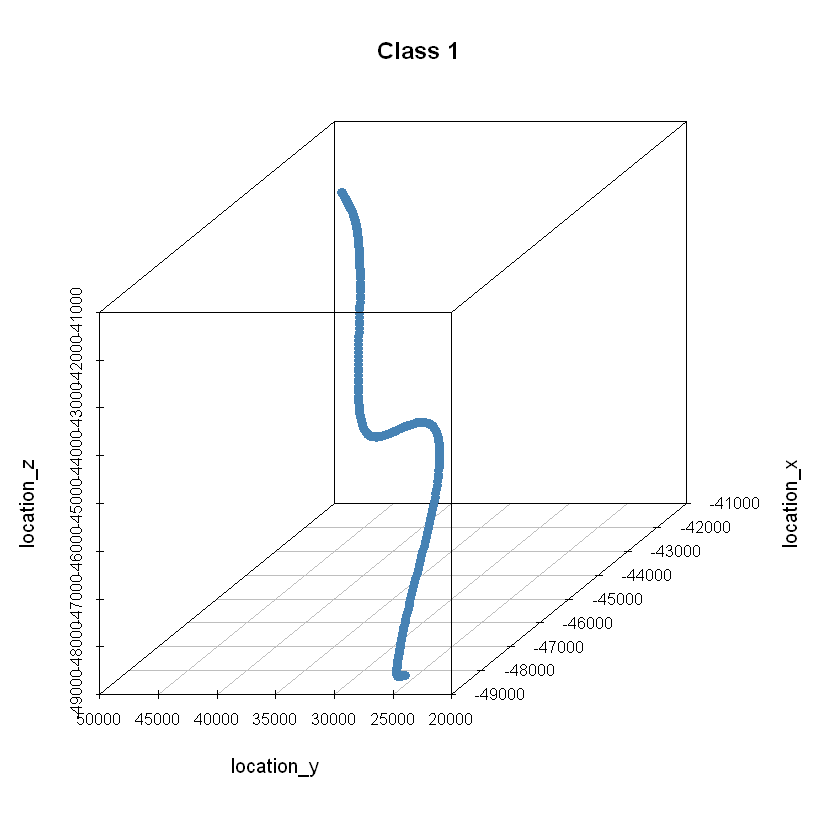

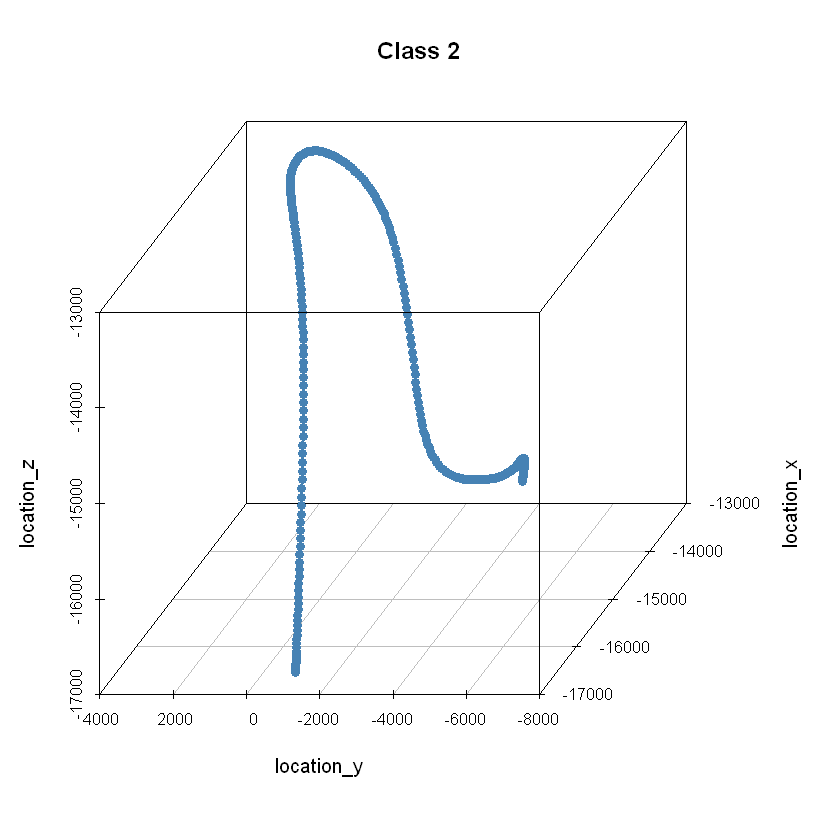

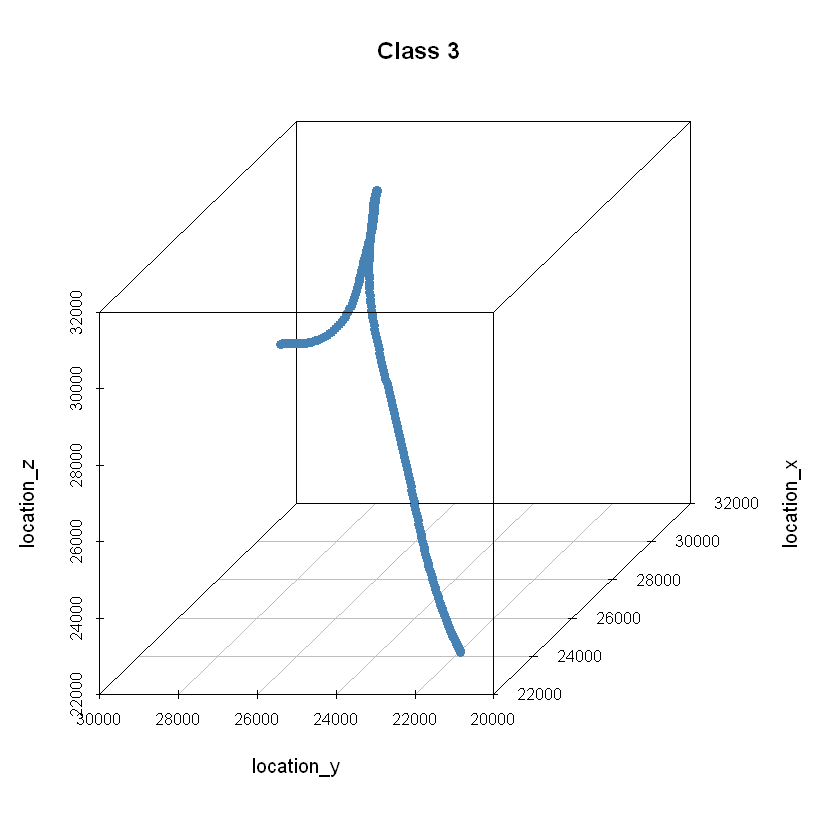

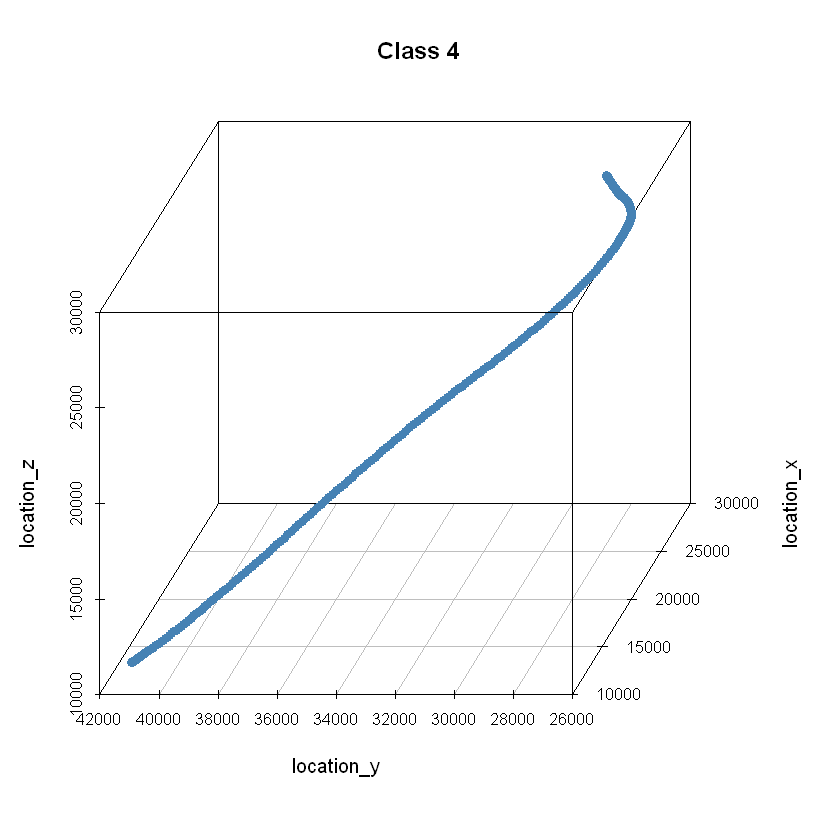

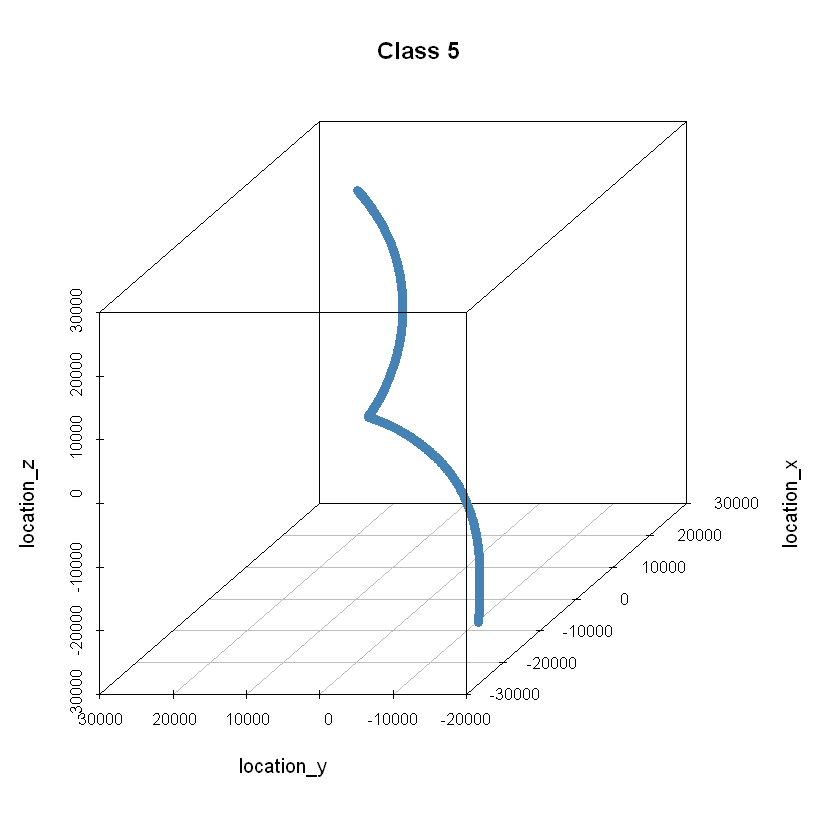

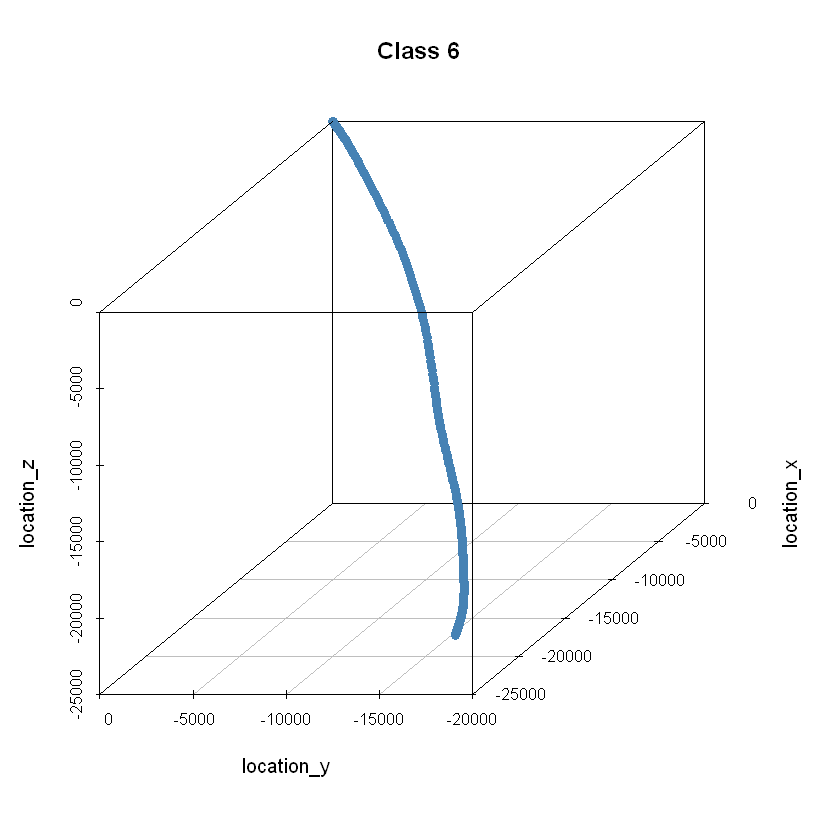

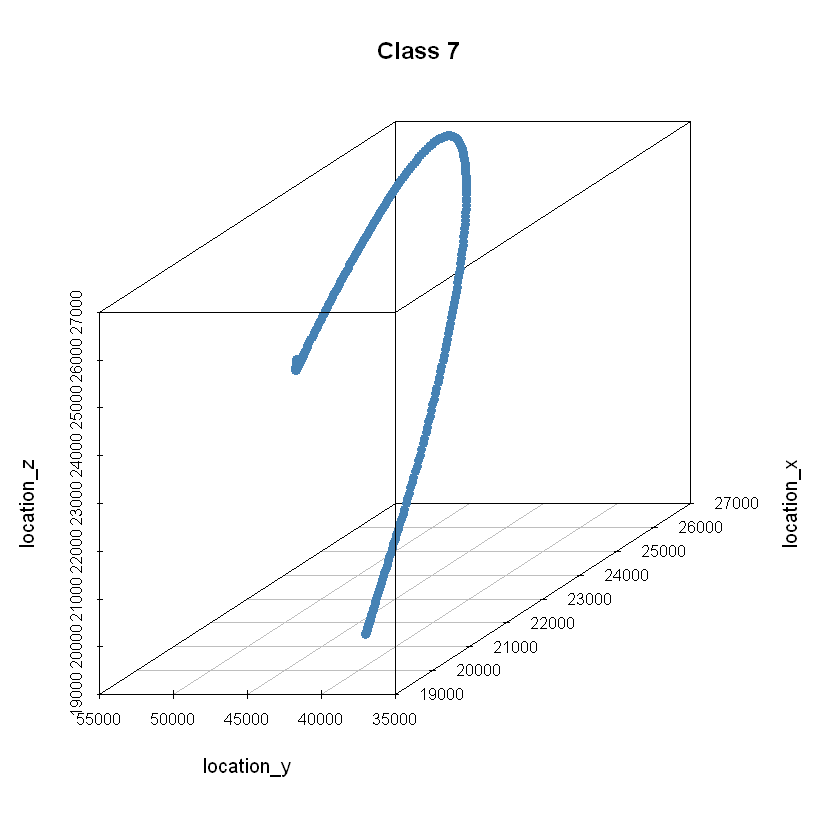

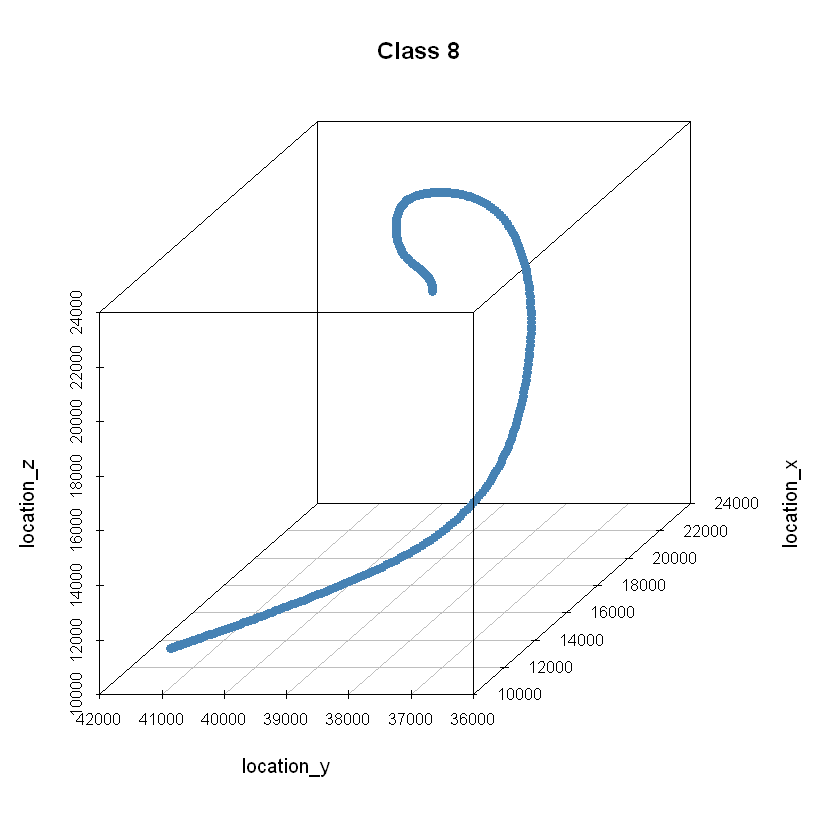

In [25]:
scatterplot3d(long_train_all[(long_train_all$class == 1) & (long_train_all$id <= 11) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 1")
scatterplot3d(long_train_all[(long_train_all$class == 2) & (long_train_all$id <= 15) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 2")
scatterplot3d(long_train_all[(long_train_all$class == 3) & (long_train_all$id <= 8) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 3")
scatterplot3d(long_train_all[(long_train_all$class == 4) & (long_train_all$id <= 5) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 4")
scatterplot3d(long_train_all[(long_train_all$class == 5) & (long_train_all$id <= 8) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 5")
scatterplot3d(long_train_all[(long_train_all$class == 6) & (long_train_all$id <= 8) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 6")
scatterplot3d(long_train_all[(long_train_all$class == 7) & (long_train_all$id <= 8) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 7")
scatterplot3d(long_train_all[(long_train_all$class == 8) & (long_train_all$id <= 8) ,10:12], angle = 225,pch = 16,color="steelblue",main = "Class 8")


Most of the classes seems like the same as the homework description. However, for example in Class 5, it does not seems like a straight line. 

## Part 2) Data Representations

In this part of the report, I used two basic approach to classify our data. Both of them are model based approaches that we see in the lectures. 

### Individual Model

- I try to build a autoregressive model that uses 2 lagged variables in this section. 

- First, I added lagged variables in the data set.

In [26]:
ar_long_train=copy(long_train_all)
ar_long_train=ar_long_train[order(id,time)]
ar_long_train[,lag1_x_val:=shift(location_x,1),by=list(id)]
ar_long_train[,lag2_x_val:=shift(location_x,2),by=list(id)]
head(ar_long_train)


id,class,time,x_value,y_value,z_value,speed_x,speed_y,speed_z,location_x,location_y,location_z,lag1_x_val,lag2_x_val
1,6,1,-1.528965,-2.119396,-1.528965,-1.528965,-2.119396,-1.528965,-1.528965,-2.119396,-1.528965,NA,NA
1,6,2,-1.528965,-2.119396,-1.528965,-3.057930,-4.238792,-3.057930,-4.586895,-6.358187,-4.586895,-1.528965,NA
1,6,3,-1.528965,-2.119396,-1.528965,-4.586895,-6.358187,-4.586895,-9.173791,-12.716375,-9.173791,-4.586895,-1.528965
1,6,4,-1.528965,-2.119396,-1.528965,-6.115860,-8.477583,-6.115860,-15.289651,-21.193958,-15.289651,-9.173791,-4.586895
1,6,5,-1.528965,-2.119396,-1.528965,-7.644825,-10.596979,-7.644825,-22.934476,-31.790937,-22.934476,-15.289651,-9.173791
1,6,6,-1.528965,-2.119396,-1.528965,-9.173791,-12.716375,-9.173791,-32.108267,-44.507312,-32.108267,-22.934476,-15.289651


With using lagged variables and `lm()` function, we calculate the coefficients of the model for each time series.

In [27]:
series_id=unique(ar_long_train$id)

In [28]:
fit_ar2 = function(dat){
    fit = lm(location_x~lag1_x_val+lag2_x_val,dat)
    return(data.frame(t(coef(fit))))
}

In [29]:
fitted_coef_lag2 <- lapply(series_id,function(x) fit_ar2(ar_long_train[id==x]))

In [54]:
coef_dt=rbindlist(fitted_coef_lag2)
                   
head(coef_dt)

X.Intercept.,lag1_x_val,lag2_x_val
-2.0772903,1.992649,-0.9927698
-0.6369280,1.990236,-0.9903716
0.9532773,2.001573,-1.0016771
6.7227663,1.994475,-0.9947181
4.4737265,2.013035,-1.0132071
3.5701147,1.993979,-0.9941722


We also need to add the `id` and `class` information to the data set which we created for the representation. 

id,X.Intercept.,lag1_x_val,lag2_x_val,class
1,-2.07729,1.992649,-0.9927698,6
1,-2.07729,1.992649,-0.9927698,6
1,-2.07729,1.992649,-0.9927698,6
1,-2.07729,1.992649,-0.9927698,6
1,-2.07729,1.992649,-0.9927698,6
1,-2.07729,1.992649,-0.9927698,6


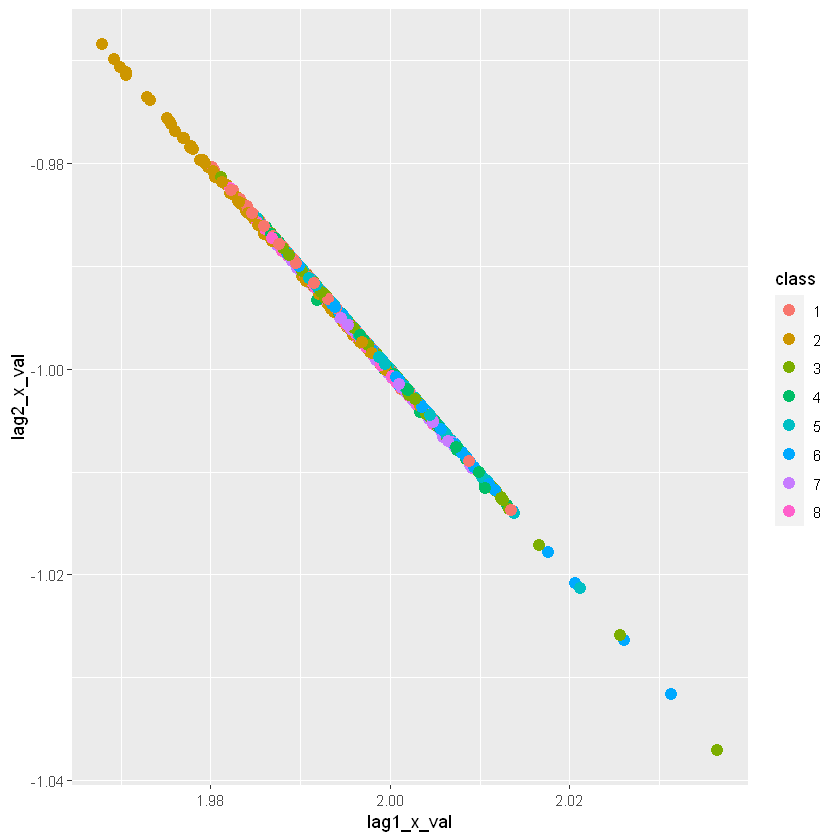

In [31]:
coef_dt[,id:=series_id] 

coef_dt=merge(coef_dt,long_train_all[,list(id,class)],by='id')
head(coef_dt)
     
ggplot(coef_dt,aes(x=lag1_x_val,y=lag2_x_val,color=class)) + geom_point(size = 3)

- However, when we plot the lag1 and lag2 variables, we cannot see clearly classification. 
- Maybe, it is useful to plot with intercept

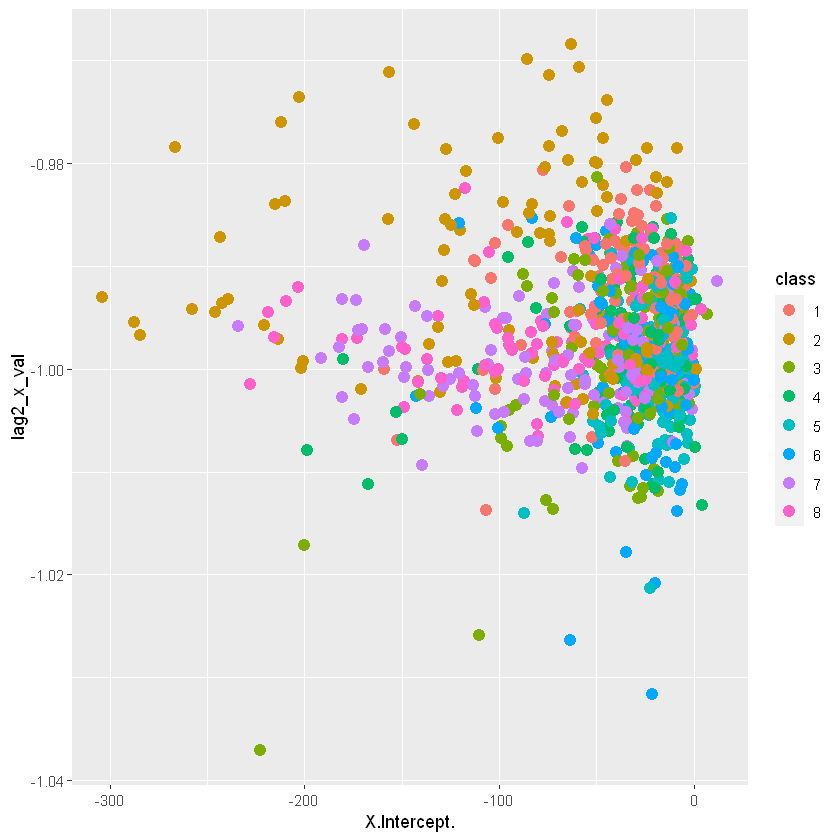

In [32]:
ggplot(coef_dt,aes(x=X.Intercept.,y=lag2_x_val,color=class)) + geom_point(size = 3)

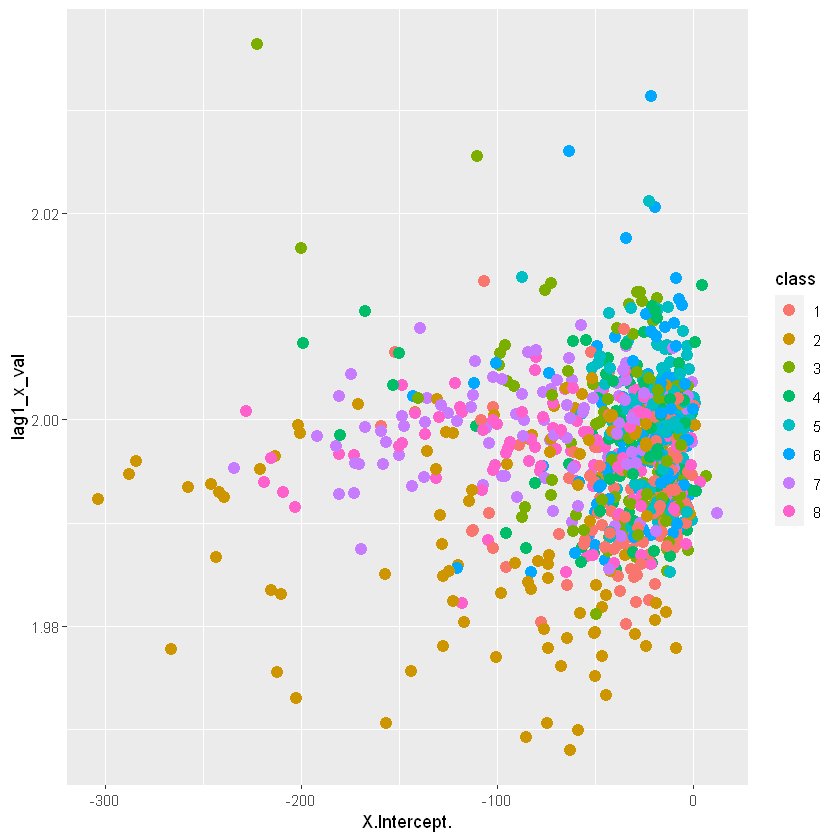

In [33]:
ggplot(coef_dt,aes(x=X.Intercept.,y=lag1_x_val,color=class)) + geom_point(size = 3)

In these plots, we can see more clear way the classes

### Class Based Models

Now, we are also going to use autoregressive model with 2 lagged variable. However, we are going to build different models for each class and see which model is best fitted for which class.

In [40]:
#Class Based Models

class_id=unique(long_train_all$class)

# AR 2 model as a function to get the model
fit_ar2=function(dat){
    fit=lm(x_value~lag1_x_val+lag2_x_val,dat)
    return(fit)
}


In [43]:
fitted_models=lapply(class_id,function(x) fit_ar2(ar_long_train[class==x]))

In [46]:
ar_train_with_predictions=copy(ar_long_train)                   
for(i in 1:length(class_id)){
    current_class=class_id[i]
    ar_train_with_predictions[,paste0('residual_',current_class):=x_value-predict(fitted_models[[i]],ar_train_with_predictions)] 
}
                     
head(ar_train_with_predictions)

id,class,time,x_value,y_value,z_value,speed_x,speed_y,speed_z,location_x,...,lag1_x_val,lag2_x_val,residual_6,residual_5,residual_3,residual_4,residual_8,residual_7,residual_1,residual_2
1,6,1,-1.528965,-2.119396,-1.528965,-1.528965,-2.119396,-1.528965,-1.528965,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,6,2,-1.528965,-2.119396,-1.528965,-3.057930,-4.238792,-3.057930,-4.586895,...,-1.528965,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,6,3,-1.528965,-2.119396,-1.528965,-4.586895,-6.358187,-4.586895,-9.173791,...,-4.586895,-1.528965,-1.441167,-1.432611,-1.485303,-1.487625,-1.507759,-1.506073,-1.489844,-1.516952
1,6,4,-1.528965,-2.119396,-1.528965,-6.115860,-8.477583,-6.115860,-15.289651,...,-9.173791,-4.586895,-1.441392,-1.432719,-1.485558,-1.487849,-1.508223,-1.506547,-1.490004,-1.517839
1,6,5,-1.528965,-2.119396,-1.528965,-7.644825,-10.596979,-7.644825,-22.934476,...,-15.289651,-9.173791,-1.441618,-1.432828,-1.485814,-1.488073,-1.508687,-1.507021,-1.490163,-1.518726
1,6,6,-1.528965,-2.119396,-1.528965,-9.173791,-12.716375,-9.173791,-32.108267,...,-22.934476,-15.289651,-1.441844,-1.432937,-1.486070,-1.488297,-1.509152,-1.507496,-1.490323,-1.519613


As you can see above, each class has residuals and below, in order to fill `NA` cells we are going to get the mean of them.

In [49]:
residual_stats=ar_train_with_predictions[,list(m1=mean(residual_1,na.rm=T),
                                m2=mean(residual_2,na.rm=T),
                                m3=mean(residual_3,na.rm=T),
                                m4=mean(residual_4,na.rm=T),
                                m5=mean(residual_5,na.rm=T),
                                m6=mean(residual_6,na.rm=T),
                                m7=mean(residual_7,na.rm=T),
                                m8=mean(residual_8,na.rm=T)), by=list(id,class)]



In [50]:
head(residual_stats)

residual_stats=melt(residual_stats,id.vars=c('id','class'))

id,class,m1,m2,m3,m4,m5,m6,m7,m8
1,6,0.03879386,-0.01874761,0.03876156,0.03819274,0.09423293,0.08120673,0.00988261,0.008438704
2,5,0.03292588,0.04156951,0.04174747,0.03821753,0.08462379,0.08215456,0.03254326,0.030235797
3,5,0.04634835,0.05492832,0.05604191,0.05182899,0.10421022,0.10105702,0.04517520,0.043140200
4,3,0.04555125,0.02342962,0.05195331,0.04847869,0.11085495,0.10218048,0.03043754,0.029054729
5,4,0.04186252,-0.01332354,0.04367836,0.04181003,0.10789457,0.09407086,0.01263791,0.011636212
6,8,0.04221989,0.02681787,0.04908148,0.04564847,0.10406965,0.09680325,0.03038341,0.028777375


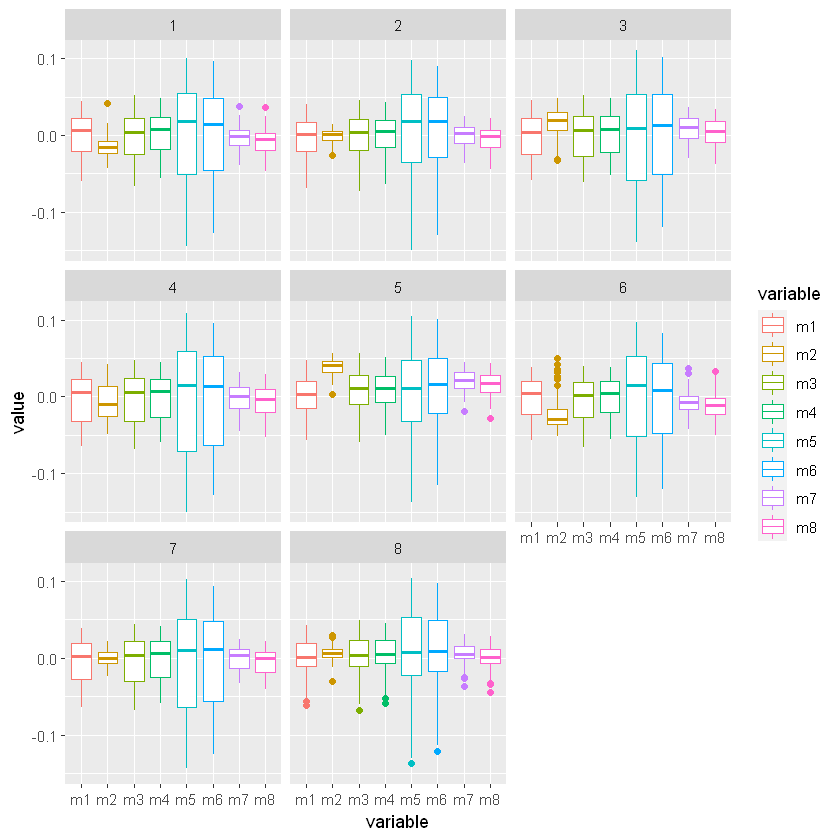

In [51]:
ggplot(residual_stats, aes(x=variable, y=value, color=variable)) +
  geom_boxplot() + facet_wrap(~class)

In these boxplots, we can comment on which class fitted best on which model. 

### Conclusion

- In this report we did visualization of our data and make a comparison the shapes with the homework decriptions. 

- The representations were not really helpful to classify the data. However with using autoregressive models, we have an idea about the classes. 

- To make a comparison, individual model more helpful to see the classes. 